<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/Sprint4_%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

問題1-4

In [291]:
iris=load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [347]:
#targetの生成
all_y=pd.DataFrame(iris.target)
all_y.columns=['Species']

#特徴量との結合
all_xy=pd.merge(iris_data,all_y,left_index=True, right_index=True)

#Targetのvirgicolorとvirginicaのみのデータの生成
part_columns=all_xy[all_xy['Species'] != 0]
print(part_columns)

#sepal_lengthとpetal_lengthのみのデータの生成
part_all1=part_columns.drop('sepal width (cm)', axis=1)
part_all=part_all1.drop('petal width (cm)', axis=1)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
50                 7.0               3.2  ...               1.4        1
51                 6.4               3.2  ...               1.5        1
52                 6.9               3.1  ...               1.5        1
53                 5.5               2.3  ...               1.3        1
54                 6.5               2.8  ...               1.5        1
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[100 rows x 5 columns]


In [348]:
#numpyに変換
x=part_columns.drop('Species', axis=1).values
y=part_columns.iloc[:,-1].values

x2=part_all.drop('Species', axis=1).values
y2=part_columns.iloc[:,-1].values


#分割 4特徴量
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#分割　2特徴量→グラフ用
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=0)
print(x_test2.shape)
print(y_test2.shape)
print(type(x_test2))
print(type(y_test2))

(25, 2)
(25,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [354]:
class ScratchLogisticRegression():
  def __init__(self, num_iter=5000, lr=0.0001, bias=True, verbose=False):
    self.iter = num_iter
    self.lr = lr
    self.bias = bias
    self.verbose = verbose
    self.lamda=0.0001
    # 損失を記録する配列を用意
    self.loss =[]
    #self.val_loss = np.zeros(self.iter)
  def _hypothesis(self,X,w):
    #仮定関数の実装
    h=np.dot(X,self.w.T) #(j,n)×(n,1)=(j,1)
    return h
  def _sigmoid(self, h):
    #シグモイド関数の実装
    y_hat=1/(1+np.exp(-1*(h))) #(j,1)
    return y_hat
    
  def _gradient_descent(self,X,y,w):
    n=X.shape[0]
    #yを行列に
    y=y.reshape(y.shape[0],1)
    for i in range(self.iter):
      #仮定関数呼び出し
      h=self._hypothesis(X,w)

      #シグモイド関数呼び出し
      y_hat=self._sigmoid(h)

      #微分計算
      dw=[]
      for i in range(X.shape[1]):
        if i==0:
          X1=X[:,0].reshape(X.shape[0],1)
          dw0=(1/n)*np.sum((y_hat-y)*X1,axis=0) #(j,1)×(j,1)→axis0:(1,1)
          #w更新
          self.w[0,i]=self.w[0,i]-self.lr*dw0
          #print(dw0.shape)    
        elif i>0:
          X2=X[:,i].reshape(X.shape[0],1)
          #print(X2.shape)
          #print(i)
          dw1=(1/n)*np.sum((y_hat-y)*X2,axis=0)+(self.lamda/n*w[0,i]) #(j,1)×(j,1)=(j,1)→(1,1)
          #print(dw1.shape)
          self.w[0,i]=self.w[0,i]-self.lr*dw1 #(1,n)

      #目的関数
      self.loss.append(-(1/n)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat),axis=0)+(self.lamda/2*n)*np.sum(w**2,axis=1)) #(j,1)×(j,1)=(j,1)→sumで(1,1)
      #print("loss: "+str(self.loss))
    
    return self.loss ,self.w

  def fit(self, X, y):
    #yのラベルの変換
    y=np.array(list(map(lambda x :1 if x > np.median(y) else 0,y)))


    #bias項の生成
    if self.bias:
      X=self._add_bias(X)
    #wの初期生成
    self.w=np.random.rand(1,X.shape[1]) #(1,n)
    #print("W"+str(self.w[0,0]))
    #最急降下法実装
    self.loss, self.w =self._gradient_descent(X,y,self.w)

    plt.plot(self.loss)
    plt.ylabel("Loss")
    plt.xlabel("Iteration")
    plt.show()
    self.w=self.w[0,1:].reshape(1,self.w.shape[1]-1)
    print(self.w.shape)
    return self.w

  def _add_bias(self,X):
    ones_add=np.ones((X.shape[0],1))
    X=np.concatenate([ones_add,X],axis=1)
    return X

  def predict(self, X):
      #仮定関数呼び出し      
      h=self._hypothesis(X,self.w)
      #シグモイド関数呼び出し
      y_hat=self._sigmoid(h)
      label=[]
      for i in y_hat:
        if i<0.5:
          label.append(0)
        else:
          label.append(1)
      label2=np.array(label)
      return label2
    
  def predict_proba(self, X):
      #仮定関数呼び出し
      h=self._hypothesis(X,self.w)
      #シグモイド関数呼び出し
      y_hat=self._sigmoid(h)
      return y_hat

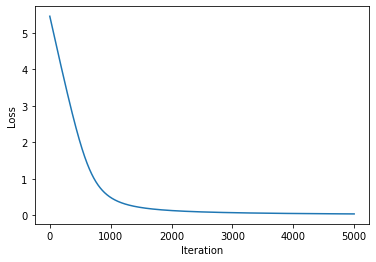

(1, 4)


array([[-0.48647102,  0.30153329, -0.42946751,  0.38805181]])

In [355]:
slr=ScratchLogisticRegression()
slr.fit(x_train, y_train)

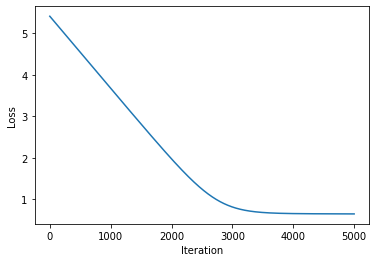

(1, 4)


array([[-0.09588502, -0.30539371,  0.30002758, -0.0347101 ]])

In [356]:
#val
slr2=ScratchLogisticRegression()
slr2.fit(x_test, y_test)

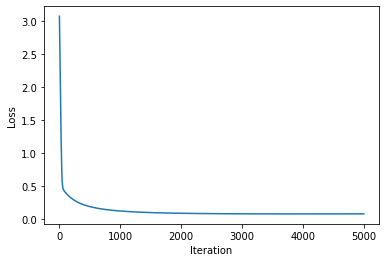

(1, 2)


array([[-1.59444748,  3.40928523]])

In [336]:
#グラフ用
slr=ScratchLogisticRegression()
slr.fit(x_train2, y_train2)

問題5 学習と推定

In [338]:
y_pred_proba=slr.predict_proba(x_test2)
print(y_pred_proba)

[[0.07464865]
 [0.99523102]
 [0.04470938]
 [0.99807986]
 [0.98876588]
 [0.96368046]
 [0.01509851]
 [0.9981625 ]
 [0.99512527]
 [0.99467841]
 [0.99236751]
 [0.98774324]
 [0.99690571]
 [0.04286411]
 [0.05425337]
 [0.09988603]
 [0.01935664]
 [0.23582515]
 [0.01804881]
 [0.09599233]
 [0.07464865]
 [0.98321688]
 [0.09792193]
 [0.9803727 ]
 [0.0531336 ]]


In [339]:
y_pred1=slr.predict(x_test2)
print(y_pred1)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


In [298]:
#SC-learn
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred2=lr.predict(x_test) 
print(y_pred2)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


In [330]:
#SC-learn グラフ用
lr = LogisticRegression()
lr.fit(x_train2, y_train2)
y_pred3=lr.predict(x_test2) 
print(y_pred3)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


In [299]:
#Accuracy
from sklearn.metrics import accuracy_score
#スクラッチ
print(accuracy_score(y_test, y_pred1))
#SC-learn
print(accuracy_score(y_test, y_pred2))

1.0
1.0


In [300]:
#Prececion
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred1))
print(precision_score(y_test, y_pred2))


1.0
1.0


In [301]:
#recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred1))
print(recall_score(y_test, y_pred2))

1.0
1.0


問題6 学習曲線のプロット

In [302]:
#上記に掲載

問題7 決定領域の可視化

In [340]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



(160270, 2)


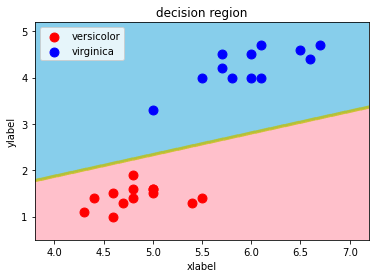

In [341]:
#y_test2=y_test2.reshape(y_test2.shape[0],1)
decision_region(x_test2,y_test2, model=slr)